In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU
import regex as re


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Day 7/toxic-comments.csv')

In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.shape

(159571, 8)

In [6]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
df.sum(numeric_only=True)

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


In [8]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [9]:
comments = df.sum(numeric_only=True)
comments

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


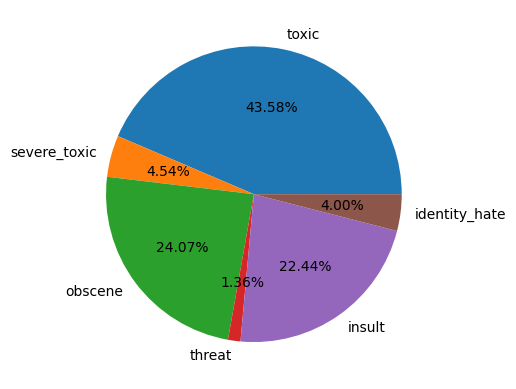

In [10]:
plt.pie(comments.values, labels=comments.index,autopct='%2.2f%%');

In [19]:
neutral = df.sum(axis = 1,numeric_only = True)
sum(neutral==0)
neutral

,0
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


**Data cleaning**

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]',' ',text)
    return text

In [13]:
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text']

,comment_text
0,explanation why the edits made under my userna...
1,d aww he matches this background colour i m s...
2,hey man i m really not trying to edit war it...
3,more i can t make any real suggestions on im...
4,you sir are my hero any chance you remember...
...,...
159566,and for the second time of asking when ...
159567,you should be ashamed of yourself that is a ...
159568,spitzer umm theres no actual article for pr...
159569,and it looks like it was actually you who put ...


In [14]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [15]:
##Separate input and output

In [16]:
x = df['comment_text']
y = df[toxicities].values

In [42]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [17]:
x

,comment_text
0,explanation why the edits made under my userna...
1,d aww he matches this background colour i m s...
2,hey man i m really not trying to edit war it...
3,more i can t make any real suggestions on im...
4,you sir are my hero any chance you remember...
...,...
159566,and for the second time of asking when ...
159567,you should be ashamed of yourself that is a ...
159568,spitzer umm theres no actual article for pr...
159569,and it looks like it was actually you who put ...


In [18]:
y.shape

(159571, 6)

**Data Preparation**

In [19]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
padded_sequences = pad_sequences(sequences,maxlen=200)

# num_words=50000 specifies that the tokenizer will keep only the 50,000 most frequent words in the text data.
#  Less frequent words will be ignored.

In [20]:
padded_sequences.shape

(159571, 200)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(padded_sequences,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape, x_test.shape

((127656, 200), (31915, 200))

In [25]:
model = Sequential()

model.add(Embedding(5000,128,input_length=200))
model.add(GRU(64))
model.add(Dense(6,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=3,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.9846 - loss: 0.0953 - val_accuracy: 0.9934 - val_loss: 0.0503
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9880 - loss: 0.0466 - val_accuracy: 0.9836 - val_loss: 0.0485
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.9774 - loss: 0.0404 - val_accuracy: 0.9870 - val_loss: 0.0504


In [29]:
sample1 = "You are waste of space.World is better without you."
sample2 = "Your life will be so beautiful with her."
sample3 = "You are stupid.No one cares about your opinion. Just shut up"

In [36]:
def predict(new_comment):
    new_sequence = tokenizer.texts_to_sequences([clean_text(new_comment)])
    new_seq_pad = pad_sequences(new_sequence,maxlen=200)
    prediction = model.predict(new_seq_pad,verbose=False)[0]
    return prediction


In [37]:
prediction = predict(sample3)
for toxicity,prob in zip(toxicities,prediction):
    print(toxicity ,'---->',prob)

toxic ----> 0.9864118
severe_toxic ----> 0.052125115
obscene ----> 0.6341737
threat ----> 0.0037803254
insult ----> 0.8087436
identity_hate ----> 0.008842163


In [38]:
prediction

array([0.9864118 , 0.05212511, 0.6341737 , 0.00378033, 0.8087436 ,
       0.00884216], dtype=float32)